In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
# Note, I suppress this future warning because Pandas is throwing a false positive. I've indicated where this warning was in the notebook below.
pd.set_option('mode.chained_assignment', None)

In [51]:
class XForce_Grapher():
    def __init__(self) -> None:
        self._data = None
        self._sources = None
        self._queries = None
        self.load("../../data/complete_db.csv")
        return None


    def peek_data(self):
        return self._data.head()

    def get_data(self):
        return self._data
    

    def get_sources(self):
        return self._sources
    

    def get_queries(self):
        return self._queries


    def set_data(self, path: str) -> None:
        self.load(path)
        return None


    def load(self, path: str) -> None:
        df = pd.read_csv(path)
        sources = list(set(df["source"].values.tolist()))
        sources.append("ALL")
        queries = list(set(df["query"].values.tolist()))

        self._data = df
        self._sources = sources
        self._queries = queries
        return None


    def graph_freq(self, query: str, source: str="ALL") -> None:
        """
        Graphs the publishing frequency of papers in the database.

        query -> str
            The given search query to visualize

        source -> int
            The database source to restrict visualizations on
            arxiv: Graph only results from arxiv
            scopus: Graph only results from scopus
            ALL: Graphs all

        Returns -> None
            Prints out matplotlib graph of the published frequen
        
        Example
            graph_freq("radiation", "arxiv")
        """
        if source not in self._sources:
            print(f"{source} not found. Available options are {self._sources}, where 'ALL' analyzes from all sources.")
            return None

        df = self._data
        if source != "ALL":
            df = df[df["source"] == source]
        df = df[df["query"] == query]
        dates_extract = df["published"].apply(lambda x: x.split('T')[0])
        dates = [datetime(int(i.split("-")[0]), int(i.split("-")[1]), int(i.split("-")[2])) for i in dates_extract]
        
        plt.title(f"Source: {source}, Query: {query}")
        plt.suptitle(f"Publish Frequency within {len(dates)} Most Recent Papers")
        plt.xlabel("Publish Dates")
        plt.ylabel("Frequency")
        plt.grid("True")
        plt.xticks(rotation=45)
        plt.hist(dates, 25, alpha=.75)
        plt.show()
        return None

In [52]:
test = XForce_Grapher()
test.graph_freq("radiation", "arxiv")

In [6]:
big_data = [generate_data(generate_counts(num_classes), num_samples) for i in range(3)]
sources = ["arXiv", "Scopus", "Web of Science"]
class_labels = ["radiation", "plasmonics", "supervised learning", "reinforcement learning", "chloroplasts", "thylakoid"]
classes = [i for i in range(6)]
big_counts = [[data.count(i) for i in classes] for data in big_data]
big_values = [[big_counts[i][j] for i in range(len(big_data))] for j in range(len(class_labels))]

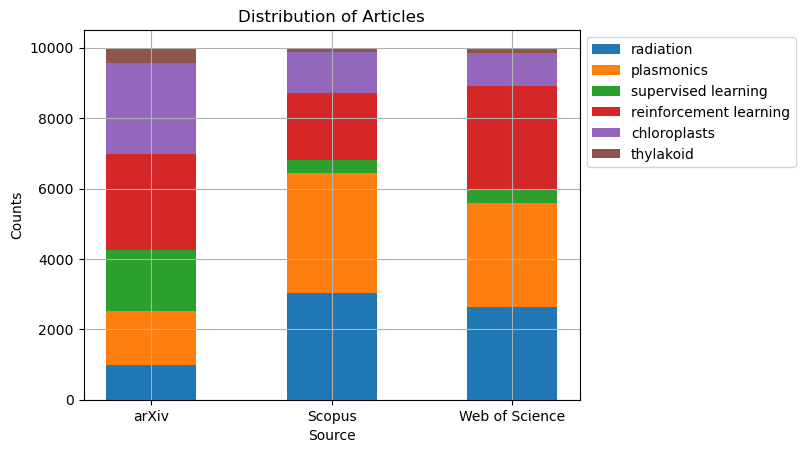

In [7]:
weight_counts = {}
for i in range(len(class_labels)):
    weight_counts[class_labels[i]] = big_values[i]

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(sources, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

plt.title(f"Distribution of Articles")
plt.xlabel("Source")
plt.ylabel("Counts")
plt.grid("True")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

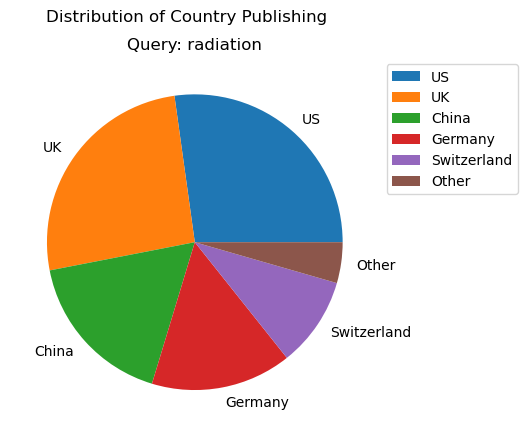

In [8]:
countries = ["US", "UK", "China", "Germany", "Switzerland", "Other"]
plt.suptitle(f"Distribution of Country Publishing")
plt.title(f"Query: {df['query'][0]}")
plt.grid("True")
values = sorted(big_counts[0], reverse=True)
plt.pie(values, labels=countries)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()